In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#w=np.array([-.1,-.1,-.1,-.1,-.1, 0])
#w=np.array([-1,-1,-1,-1,-1, 0])
#c=np.array([  1,  1,  1,.01,100, 1e10])*1e-6
e1e2t=214298.32535430687
e3t=np.array([25.70331479, 26.28684983, 26.59728865, 26.75965336, 
              26.84381704, 26.88724213, 26.90959407, 26.92108493,
              26.9269885,  26.93002054, 26.93157752, 26.93237697,])
# step 24:
c=np.array([2.65121251e-01, 1.90705761e-01, 1.62778839e-01, 1.63109794e-01, 
                   1.41612262e-01, 1.20875522e-01, 1.02854975e-01, 9.03575793e-02,
                   6.69111013e-02, 3.21567655e-02, 2.10060075e-01, 0.0])
# step 0:
#c=np.array([0.20331727, 0.16865452, 0.15772118, 0.14340848,
#            0.11826674, 0.10116881, 0.08674008, 0.07820327,
#            0.06499595, 0.04768646, 0.1204031 , 0.])
#w=-1*np.ones(np.shape(c))*2.8e-4
#w[-1]=0
w=np.array([ 3.871025,  -96.635605, -40.600544,  20.52446,  
            -6.9390144, -10.459614, -70.14894,  -30.304188,  
            -17.269821, -46.92218,  -61.723824,  0.      ]) 
tmask=np.ones(np.shape(c))
tmask[-1]=0

In [3]:
#1. bottom value zero
zwz=np.zeros(np.shape(c))
#2. upstream advection
zwz[1:]=w[1:]*c[:-1]
zwz

array([  0.        , -25.62015249,  -7.74275764,   3.34094777,
        -1.13182121,  -1.4812096 ,  -8.47928974,  -3.1169365 ,
        -1.56045922,  -3.13961474,  -1.98483853,   0.        ])

In [4]:
dt=40*2


In [5]:
ztra=np.zeros(np.shape(c))
ztra[:-1]=-1*(zwz[:-1]-zwz[1:])/e1e2t
delc_upwind=ztra.copy() # ** added to tra at this step
zwi=(e3t*c+dt*ztra)/e3t*tmask # set fse3t's to 1
zwi # upwind increases low point from .01 to .0298 in one time step

array([0.26474915, 0.19095965, 0.16293441, 0.1630474 , 0.1416074 ,
       0.12077836, 0.10292937, 0.09037916, 0.06688921, 0.03217277,
       0.21008759, 0.        ])

In [6]:
# 3. antidiffusive flux
zwz_sav=zwz.copy()

In [7]:
jnzts=20 # same as SSC

In [8]:
cb=c.copy()

In [9]:
ca=np.zeros(np.shape(c))
zwzts=np.zeros(np.shape(c))

In [10]:
for jl in range(0,jnzts):
    if jl==0:
        jtaken=np.mod(jnzts+1,2)
        print(jtaken)
        zts=dt/jnzts # z_rzts=1/jnzts
        cn=c.copy() # this makes first step euler
    elif jl==1:
        zts=2*dt/jnzts
    zwz[1:]=.5*w[1:]*(cn[1:]+cn[:-1])
    if jtaken==0:
        zwzts[1:]=zwzts[1:]+zwz[1:]*zts
    jtaken=np.mod(jtaken+1,2) # switch on/off
    
    zbtr=1/(e1e2t*e3t)
    ztra[1:-1]=-1*zbtr[1:-1]*(zwz[1:-1]-zwz[2:])
    ca[1:-1]=cb[1:-1]+zts*ztra[1:-1] # step forward
    # swap for next step:
    cb=cn.copy()
    cn=ca.copy()
    ca=np.zeros(np.shape(c))

1


In [11]:
cn

array([0.        , 0.1907347 , 0.16292653, 0.16304839, 0.14160788,
       0.12078563, 0.10292321, 0.09037935, 0.06689772, 0.03208534,
       0.2101637 , 0.        ])

In [12]:
zwzts

array([   0.        , -737.24975952, -574.224872  ,  267.58294193,
        -84.56969846, -109.80111354, -627.74791   , -234.26053677,
       -108.64297454, -185.85962636, -598.0617406 ,    0.        ])

In [13]:
# anti-diffusive vertical flux using average flux from sub-timestepping
zwz=zwzts/dt-zwz_sav

In [14]:
zwz

array([ 0.00000000e+00,  1.64045305e+01,  5.64946741e-01,  3.83900425e-03,
        7.46999786e-02,  1.08695679e-01,  6.32440865e-01,  1.88679790e-01,
        2.02422039e-01,  8.16369410e-01, -5.49093322e+00,  0.00000000e+00])

In [15]:
zbig=1e40
zrtrn=1e-15

In [16]:
# 4. nonosc(pbef=ptb,zwx,zwy,pcc=zwz,paft=zwi,p2dt)
# zwi is after value based on upwind
pbef=c.copy()
paft=zwi.copy()
# search local extrema
zbup=np.maximum(pbef*tmask-zbig*(1-tmask),paft*tmask-zbig*(1-tmask))
zbup

array([ 2.65121251e-01,  1.90959646e-01,  1.62934406e-01,  1.63109794e-01,
        1.41612262e-01,  1.20875522e-01,  1.02929366e-01,  9.03791628e-02,
        6.69111013e-02,  3.21727733e-02,  2.10087588e-01, -1.00000000e+40])

In [17]:
zbdo=np.minimum(pbef*tmask+zbig*(1-tmask),paft*tmask+zbig*(1-tmask))
zbdo

array([2.64749147e-01, 1.90705761e-01, 1.62778839e-01, 1.63047396e-01,
       1.41607403e-01, 1.20778358e-01, 1.02854975e-01, 9.03575793e-02,
       6.68892081e-02, 3.21567655e-02, 2.10060075e-01, 1.00000000e+40])

In [18]:
zup=np.zeros(np.shape(c))
zdo=zup.copy()
zup[0]=np.maximum(zbup[0],zbup[1])
zup[1:-1]=np.maximum(np.maximum(zbup[:-2],zbup[1:-1]),zbup[2:])
#zup[-1]=np.maximum(zbup[-2],zbup[-1]) this is never calculated
zup

array([0.26512125, 0.26512125, 0.19095965, 0.16310979, 0.16310979,
       0.14161226, 0.12087552, 0.10292937, 0.09037916, 0.21008759,
       0.21008759, 0.        ])

In [19]:
zdo[0]=np.minimum(zbdo[0],zbdo[1])
zdo[1:-1]=np.minimum(np.minimum(zbdo[:-2],zbdo[1:-1]),zbdo[2:])
#zdo[-1]=np.minimum(zbdo[-2],zbdo[-1])
zdo

array([0.19070576, 0.16277884, 0.16277884, 0.1416074 , 0.12077836,
       0.10285498, 0.09035758, 0.06688921, 0.03215677, 0.03215677,
       0.03215677, 0.        ])

(12, 0)

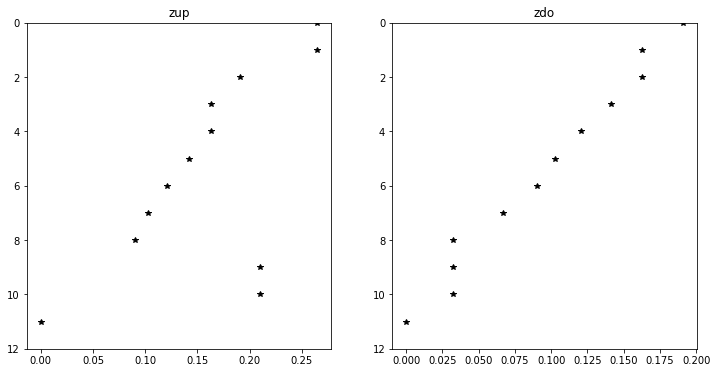

In [20]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(zup,np.arange(0,len(zbup)),'k*')
ax[0].set_title('zup')
ax[0].set_ylim(12,0)
ax[1].plot(zdo,np.arange(0,len(zdo)),'k*')
ax[1].set_title('zdo')
ax[1].set_ylim(12,0)

In [21]:
zeros=np.zeros(np.shape(c))
pcc=zwz.copy()
zpos=np.zeros(np.shape(c))
zneg=zpos.copy()
zpos[:-1]=np.maximum(zeros[1:],pcc[1:])-np.minimum(zeros[:-1],pcc[:-1])
zneg[:-1]=np.maximum(zeros[:-1],pcc[:-1])-np.minimum(zeros[1:],pcc[1:])


In [22]:
zpos

array([1.64045305e+01, 5.64946741e-01, 3.83900425e-03, 7.46999786e-02,
       1.08695679e-01, 6.32440865e-01, 1.88679790e-01, 2.02422039e-01,
       8.16369410e-01, 0.00000000e+00, 5.49093322e+00, 0.00000000e+00])

In [23]:
zneg

array([0.00000000e+00, 1.64045305e+01, 5.64946741e-01, 3.83900425e-03,
       7.46999786e-02, 1.08695679e-01, 6.32440865e-01, 1.88679790e-01,
       2.02422039e-01, 6.30730263e+00, 0.00000000e+00, 0.00000000e+00])

(12, 0)

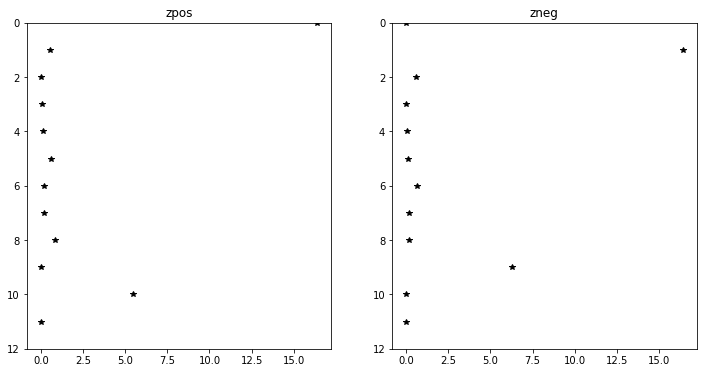

In [24]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(zpos,np.arange(0,len(zpos)),'k*')
ax[0].set_title('zpos')
ax[0].set_ylim(12,0)
ax[1].plot(zneg,np.arange(0,len(zneg)),'k*')
ax[1].set_title('zneg')
ax[1].set_ylim(12,0)

In [25]:
#! up & down beta terms
zbt = e1e2t*e3t / dt
zbetup = ( zup - paft) / ( zpos + zrtrn ) * zbt
zbetdo = ( paft - zdo ) / ( zneg + zrtrn ) * zbt


In [26]:
zbetup

array([1.56177298e+00, 9.24355326e+03, 5.20112026e+05, 5.98764425e+01,
       1.42248447e+04, 2.37260683e+03, 6.85617661e+03, 4.47109921e+03,
       2.07544883e+03, 1.28344596e+19, 0.00000000e+00, 0.00000000e+00])

In [27]:
zbetdo

array([5.09805127e+18, 1.20964227e+02, 1.96190271e+01, 4.00327411e+05,
       2.00503490e+04, 1.18763438e+04, 1.43289053e+03, 8.97796986e+03,
       1.23763935e+04, 1.83085587e-01, 1.28363565e+19, 0.00000000e+00])

(12, 0)

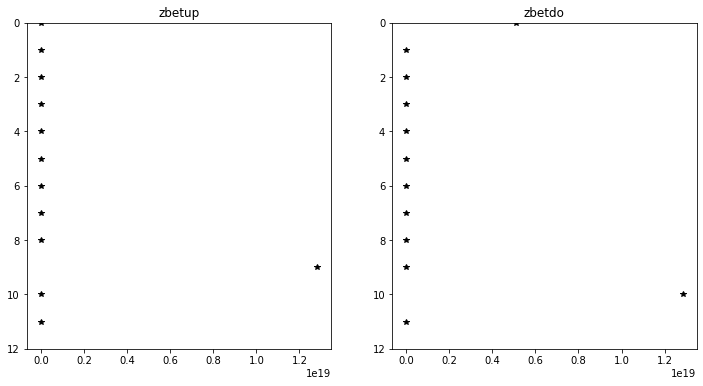

In [28]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(zbetup,np.arange(0,len(zbetup)),'k*')
ax[0].set_title('zbetup')
ax[0].set_ylim(12,0)
ax[1].plot(zbetdo,np.arange(0,len(zbetdo)),'k*')
ax[1].set_title('zbetdo')
ax[1].set_ylim(12,0)

In [29]:
#! monotonic flux in the k direction, i.e. pcc
ones=np.ones(np.shape(c))
za=zeros.copy()
zb=zeros.copy()
zc=zeros.copy()
za[:-1] = np.minimum(np.minimum( ones[1:], zbetdo[1:]), zbetup[:-1] )
zb[:-1] = np.minimum(np.minimum( ones[1:], zbetup[1:]), zbetdo[:-1] )
zc[:-1]=np.where(pcc[1:]<0,0,1)
#zc[:-1]=.5+np.abs(pcc[1:])/pcc[1:]*.5
#zc =       ( 0.5  + SIGN( 0.5 , pcc(ji,jj,jk+1) ) )
# SIGN(A,B) returns value of A with sign of B
pcc[1:]=pcc[1:]*(zc[:-1]*za[:-1]+(1-zc[:-1])*zb[:-1])
#pcc(ji,jj,jk+1) = pcc(ji,jj,jk+1) * ( zc * za + ( 1._wp - zc) * zb )

In [30]:
pcc

array([ 0.00000000e+00,  1.64045305e+01,  5.64946741e-01,  3.83900425e-03,
        7.46999786e-02,  1.08695679e-01,  6.32440865e-01,  1.88679790e-01,
        2.02422039e-01,  1.49465473e-01, -0.00000000e+00,  0.00000000e+00])

In [31]:
# before nonosc, zwz contains difference between centered substepped leapfrog and upwind:
zwz

array([ 0.00000000e+00,  1.64045305e+01,  5.64946741e-01,  3.83900425e-03,
        7.46999786e-02,  1.08695679e-01,  6.32440865e-01,  1.88679790e-01,
        2.02422039e-01,  8.16369410e-01, -5.49093322e+00,  0.00000000e+00])

In [32]:
# after nonosc, zwz (pcc) is adjusted so that only one element changes from upwind 

In [33]:
# 5. final trend with corrected fluxes
ztra=0*ztra
ztra2=ztra.copy()
ztra[:-1]=-1*zbtr[:-1]*(pcc[:-1]-pcc[1:])
ztra2[:-1]=-1*zbtr[:-1]*(zwz[:-1]-zwz[1:])

In [34]:
# total change is ztra+delc, ztra is after nonosc adjustment
ztra

array([ 2.97821395e-06, -2.81181306e-06, -9.84441952e-08,  1.23568524e-08,
        5.90963889e-09,  9.08981426e-08, -7.69525972e-08,  2.38202592e-09,
       -9.17726462e-09, -2.58991444e-08,  0.00000000e+00,  0.00000000e+00])

In [35]:
ztra2 # this is before nonosc version

array([ 2.97821395e-06, -2.81181306e-06, -9.84441952e-08,  1.23568524e-08,
        5.90963889e-09,  9.08981426e-08, -7.69525972e-08,  2.38202592e-09,
        1.06395824e-07, -1.09291958e-06,  9.51405356e-07,  0.00000000e+00])

In [36]:
delc_upwind

array([-1.19553676e-04,  8.34229330e-05,  5.17209147e-05, -2.08716936e-05,
       -1.63038320e-06, -3.26557855e-05,  2.50228425e-05,  7.26313319e-06,
       -7.36895875e-06,  5.38863849e-06,  9.26203474e-06,  0.00000000e+00])

In [37]:
delc_upwind+ztra

array([-1.16575462e-04,  8.06111200e-05,  5.16224705e-05, -2.08593367e-05,
       -1.62447356e-06, -3.25648873e-05,  2.49458899e-05,  7.26551521e-06,
       -7.37813601e-06,  5.36273935e-06,  9.26203474e-06,  0.00000000e+00])

In [38]:
delc_upwind+ztra2

array([-1.16575462e-04,  8.06111200e-05,  5.16224705e-05, -2.08593367e-05,
       -1.62447356e-06, -3.25648873e-05,  2.49458899e-05,  7.26551521e-06,
       -7.26256292e-06,  4.29571891e-06,  1.02134401e-05,  0.00000000e+00])

In [39]:
c

array([0.26512125, 0.19070576, 0.16277884, 0.16310979, 0.14161226,
       0.12087552, 0.10285498, 0.09035758, 0.0669111 , 0.03215677,
       0.21006008, 0.        ])